### Import Required Libraries and Set Up Environment Variables

In [1]:
# Dependencies

import requests
import time
from dotenv import load_dotenv
import os
import pandas as pd
import json
import os
from datetime import datetime
## Load the NASA_API_KEY from the env file
load_dotenv()
NASA_API_KEY = os.getenv('NASA_API_KEY')


### CME Data

In [2]:
# Set the base URL to NASA's DONKI API:

base_url = "https://api.nasa.gov/DONKI/"

# Set the specifier for CMEs:
CME = "CME"

# Search for CMEs published between a begin and end date
startDate = "2013-05-01"
endDate   = "2024-05-01"

# Build URL for CME
# Per Documentation https://api.nasa.gov/DONKI/CME?startDate=2017-01-03&endDate=2017-01-03&api_key=DEMO_KEY
query_url = f"{base_url}{CME}?startDate={startDate}&endDate={endDate}&api_key={NASA_API_KEY}"


In [3]:
print('CME')
print(startDate)
print(endDate)
#print(query_url)


CME
2013-05-01
2024-05-01


In [4]:
# Make a "GET" request for the CME URL and store it in a variable named cme_response

cme_response = requests.get(query_url)
print(f"The NASA API responded with: {cme_response}.")


The NASA API responded with: <Response [200]>.


In [5]:
# Convert the response variable to json and store it as a variable named cme_json

cme_json = cme_response.json()
cme_json[0]


{'activityID': '2013-05-01T03:12:00-CME-001',
 'catalog': 'M2M_CATALOG',
 'startTime': '2013-05-01T03:12Z',
 'instruments': [{'displayName': 'SOHO: LASCO/C2'},
  {'displayName': 'SOHO: LASCO/C3'},
  {'displayName': 'STEREO A: SECCHI/COR2'},
  {'displayName': 'STEREO B: SECCHI/COR2'}],
 'sourceLocation': '',
 'activeRegionNum': None,
 'note': '',
 'submissionTime': '2013-08-07T16:54Z',
 'versionId': 1,
 'link': 'https://webtools.ccmc.gsfc.nasa.gov/DONKI/view/CME/2349/-1',
 'cmeAnalyses': [{'isMostAccurate': True,
   'time21_5': '2013-05-01T07:07Z',
   'latitude': 12.0,
   'longitude': -120.0,
   'halfAngle': 36.0,
   'speed': 860.0,
   'type': 'C',
   'featureCode': 'null',
   'imageType': None,
   'measurementTechnique': 'null',
   'note': '',
   'levelOfData': 0,
   'tilt': None,
   'minorHalfWidth': None,
   'speedMeasuredAtHeight': None,
   'submissionTime': '2013-08-07T16:54Z',
   'link': 'https://webtools.ccmc.gsfc.nasa.gov/DONKI/view/CMEAnalysis/2350/-1',
   'enlilList': [{'model

In [6]:
# Preview the first result in JSON format
# Use json.dumps with argument indent=4 to format data

print(json.dumps(cme_json[0], indent=4))


{
    "activityID": "2013-05-01T03:12:00-CME-001",
    "catalog": "M2M_CATALOG",
    "startTime": "2013-05-01T03:12Z",
    "instruments": [
        {
            "displayName": "SOHO: LASCO/C2"
        },
        {
            "displayName": "SOHO: LASCO/C3"
        },
        {
            "displayName": "STEREO A: SECCHI/COR2"
        },
        {
            "displayName": "STEREO B: SECCHI/COR2"
        }
    ],
    "sourceLocation": "",
    "activeRegionNum": null,
    "note": "",
    "submissionTime": "2013-08-07T16:54Z",
    "versionId": 1,
    "link": "https://webtools.ccmc.gsfc.nasa.gov/DONKI/view/CME/2349/-1",
    "cmeAnalyses": [
        {
            "isMostAccurate": true,
            "time21_5": "2013-05-01T07:07Z",
            "latitude": 12.0,
            "longitude": -120.0,
            "halfAngle": 36.0,
            "speed": 860.0,
            "type": "C",
            "featureCode": "null",
            "imageType": null,
            "measurementTechnique": "null",
   

In [7]:
# Convert cme_json to a Pandas DataFrame

cme_pd = pd.DataFrame(cme_json)

# cme_pd

# Keep only the columns: activityID, startTime, linkedEvents

fixed_cme_pd = cme_pd[['activityID', 'startTime', 'linkedEvents']]
fixed_cme_pd


,activityID,startTime,linkedEvents
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,[{'activityID': '2013-05-04T04:52:00-IPS-001'}]
1,2013-05-02T05:24:00-CME-001,2013-05-02T05:24Z,None
2,2013-05-02T14:36:00-CME-001,2013-05-02T14:36Z,None
3,2013-05-03T18:00:00-CME-001,2013-05-03T18:00Z,None
4,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,[{'activityID': '2013-05-07T04:37:00-IPS-001'}]
...,...,...,...
5519,2024-05-01T06:36:00-CME-001,2024-05-01T06:36Z,None
5520,2024-05-01T11:36:00-CME-001,2024-05-01T11:36Z,None
5521,2024-05-01T12:36:00-CME-001,2024-05-01T12:36Z,None
5522,2024-05-01T17:36:00-CME-001,2024-05-01T17:36Z,None


In [8]:
# Notice that the linkedEvents column allows us to identify the corresponding GST
# Remove rows with missing 'linkedEvents' since we won't be able to assign these to GSTs

filtered_cme_pd = fixed_cme_pd.dropna(subset=['linkedEvents'])

filtered_cme_pd


,activityID,startTime,linkedEvents
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,[{'activityID': '2013-05-04T04:52:00-IPS-001'}]
4,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,[{'activityID': '2013-05-07T04:37:00-IPS-001'}]
7,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,[{'activityID': '2013-05-12T23:30:00-IPS-001'}]
10,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,[{'activityID': '2013-05-13T01:53:00-FLR-001'}...
13,2013-05-13T16:18:00-CME-001,2013-05-13T16:18Z,[{'activityID': '2013-05-13T15:40:00-FLR-001'}...
...,...,...,...
5496,2024-04-24T01:48:00-CME-001,2024-04-24T01:48Z,[{'activityID': '2024-04-26T00:17:00-IPS-001'}]
5499,2024-04-24T15:05:00-CME-001,2024-04-24T15:05Z,[{'activityID': '2024-04-24T14:02:00-FLR-001'}]
5504,2024-04-25T18:24:00-CME-001,2024-04-25T18:24Z,[{'activityID': '2024-04-25T17:03:00-FLR-001'}]
5516,2024-04-30T00:36:00-CME-001,2024-04-30T00:36Z,[{'activityID': '2024-04-30T00:46:00-FLR-001'}]


In [9]:
# Notice that the linkedEvents sometimes contains multiple events per row
# Write a nested for loop that iterates first over each row in the cme DataFrame (using the index)
# and then iterates over the values in 'linkedEvents' 
# and adds the elements individually to a list of dictionaries where each row is one element 

# Initialize an empty list to store the expanded rows

expanded_rows = []

# Iterate over each index in the DataFrame
    # Iterate over each dictionary in the list
            # Append a new dictionary to the expanded_rows list for each dictionary item and corresponding 'activityID' and 'startTime' value

for i in cme_pd.index:
    activity_id = cme_pd.at[i, 'activityID']
    start_time = cme_pd.at[i, 'startTime']
    linked_events = cme_pd.at[i, 'linkedEvents']
    if isinstance(linked_events, list):
        for event in linked_events:
            expanded_rows.append({
                'activityID': activity_id,
                'startTime': start_time,
                'linkedEvent': event
            })
# Create a new DataFrame from the expanded rows

expanded_df = pd.DataFrame(expanded_rows)
expanded_df


,activityID,startTime,linkedEvent
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,{'activityID': '2013-05-04T04:52:00-IPS-001'}
1,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,{'activityID': '2013-05-07T04:37:00-IPS-001'}
2,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,{'activityID': '2013-05-12T23:30:00-IPS-001'}
3,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T01:53:00-FLR-001'}
4,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T04:12:00-SEP-001'}
...,...,...,...
1709,2024-04-24T01:48:00-CME-001,2024-04-24T01:48Z,{'activityID': '2024-04-26T00:17:00-IPS-001'}
1710,2024-04-24T15:05:00-CME-001,2024-04-24T15:05Z,{'activityID': '2024-04-24T14:02:00-FLR-001'}
1711,2024-04-25T18:24:00-CME-001,2024-04-25T18:24Z,{'activityID': '2024-04-25T17:03:00-FLR-001'}
1712,2024-04-30T00:36:00-CME-001,2024-04-30T00:36Z,{'activityID': '2024-04-30T00:46:00-FLR-001'}


In [10]:
# Create a function called extract_activityID_from_dict that takes a dict as input such as in linkedEvents
# and verify below that it works as expected using one row from linkedEvents as an example
# Be sure to use a try and except block to handle errors
# Log the error or print it for debugging

def extract_activityID_from_dict(input_dict):
    try:
        return input_dict.get('activityID', None)
    except (ValueError, TypeError) as e:
        print(f"Error encountered: {e}")
        return None

test_row = cme_pd.loc[0, 'linkedEvents']

if isinstance(test_row, list) and len(test_row) > 0:
    first_dict_in_linkedEvents = test_row[0]
    result = extract_activityID_from_dict(first_dict_in_linkedEvents)
    print("Extracted activityID:", result)
else:
    print("No valid dictionary found in 'linkedEvents'")
    

Extracted activityID: 2013-05-04T04:52:00-IPS-001


In [11]:
# Apply this function to each row in the 'linkedEvents' column (you can use apply() and a lambda function)
# and create a new column called 'GST_ActivityID' using loc indexer:

expanded_df_with_gst = expanded_df.copy()
expanded_df_with_gst['GST_ActivityID'] = expanded_df_with_gst['linkedEvent'].apply(lambda x: extract_activityID_from_dict(x))
expanded_df_with_gst


,activityID,startTime,linkedEvent,GST_ActivityID
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,{'activityID': '2013-05-04T04:52:00-IPS-001'},2013-05-04T04:52:00-IPS-001
1,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,{'activityID': '2013-05-07T04:37:00-IPS-001'},2013-05-07T04:37:00-IPS-001
2,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,{'activityID': '2013-05-12T23:30:00-IPS-001'},2013-05-12T23:30:00-IPS-001
3,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T01:53:00-FLR-001'},2013-05-13T01:53:00-FLR-001
4,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T04:12:00-SEP-001'},2013-05-13T04:12:00-SEP-001
...,...,...,...,...
1709,2024-04-24T01:48:00-CME-001,2024-04-24T01:48Z,{'activityID': '2024-04-26T00:17:00-IPS-001'},2024-04-26T00:17:00-IPS-001
1710,2024-04-24T15:05:00-CME-001,2024-04-24T15:05Z,{'activityID': '2024-04-24T14:02:00-FLR-001'},2024-04-24T14:02:00-FLR-001
1711,2024-04-25T18:24:00-CME-001,2024-04-25T18:24Z,{'activityID': '2024-04-25T17:03:00-FLR-001'},2024-04-25T17:03:00-FLR-001
1712,2024-04-30T00:36:00-CME-001,2024-04-30T00:36Z,{'activityID': '2024-04-30T00:46:00-FLR-001'},2024-04-30T00:46:00-FLR-001


In [12]:
# Remove rows with missing GST_ActivityID, since we can't assign them to GSTs:

expanded_df_with_gst_cleaned = expanded_df_with_gst.dropna(subset=['GST_ActivityID'])
expanded_df_with_gst_cleaned


,activityID,startTime,linkedEvent,GST_ActivityID
0,2013-05-01T03:12:00-CME-001,2013-05-01T03:12Z,{'activityID': '2013-05-04T04:52:00-IPS-001'},2013-05-04T04:52:00-IPS-001
1,2013-05-03T22:36:00-CME-001,2013-05-03T22:36Z,{'activityID': '2013-05-07T04:37:00-IPS-001'},2013-05-07T04:37:00-IPS-001
2,2013-05-09T19:29:00-CME-001,2013-05-09T19:29Z,{'activityID': '2013-05-12T23:30:00-IPS-001'},2013-05-12T23:30:00-IPS-001
3,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T01:53:00-FLR-001'},2013-05-13T01:53:00-FLR-001
4,2013-05-13T02:54:00-CME-001,2013-05-13T02:54Z,{'activityID': '2013-05-13T04:12:00-SEP-001'},2013-05-13T04:12:00-SEP-001
...,...,...,...,...
1709,2024-04-24T01:48:00-CME-001,2024-04-24T01:48Z,{'activityID': '2024-04-26T00:17:00-IPS-001'},2024-04-26T00:17:00-IPS-001
1710,2024-04-24T15:05:00-CME-001,2024-04-24T15:05Z,{'activityID': '2024-04-24T14:02:00-FLR-001'},2024-04-24T14:02:00-FLR-001
1711,2024-04-25T18:24:00-CME-001,2024-04-25T18:24Z,{'activityID': '2024-04-25T17:03:00-FLR-001'},2024-04-25T17:03:00-FLR-001
1712,2024-04-30T00:36:00-CME-001,2024-04-30T00:36Z,{'activityID': '2024-04-30T00:46:00-FLR-001'},2024-04-30T00:46:00-FLR-001


In [13]:
# print out the datatype of each column in this DataFrame:

#expanded_df_with_gst_cleaned.dtypes

expanded_df_with_gst_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   activityID      1714 non-null   object
 1   startTime       1714 non-null   object
 2   linkedEvent     1714 non-null   object
 3   GST_ActivityID  1714 non-null   object
dtypes: object(4)
memory usage: 53.7+ KB


In [14]:
# Convert the 'GST_ActivityID' column to string format 

expanded_df_with_gst_cleaned['GST_ActivityID'] = expanded_df_with_gst_cleaned['GST_ActivityID'].astype('string')

# Convert startTime to datetime format

expanded_df_with_gst_cleaned['startTime'] = pd.to_datetime(expanded_df_with_gst_cleaned['startTime'])

# Rename startTime to startTime_CME and activityID to cmeID

expanded_df_with_gst_cleaned = expanded_df_with_gst_cleaned.rename(columns={
    'startTime': 'startTime_CME',
    'activityID': 'cmeID'
})

# Drop linkedEvents

expanded_df_with_gst_cleaned = expanded_df_with_gst_cleaned.drop(columns=['linkedEvent'])

# Verify that all steps were executed correctly

expanded_df_with_gst_cleaned.info()

# if isinstance(expanded_df_with_gst_cleaned['GST_ActivityID'].iloc[0], str):
#     print("GST_ActivityID is a string.")
# else:
#     print("GST_ActivityID is not a string.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   cmeID           1714 non-null   object             
 1   startTime_CME   1714 non-null   datetime64[ns, UTC]
 2   GST_ActivityID  1714 non-null   string             
dtypes: datetime64[ns, UTC](1), object(1), string(1)
memory usage: 40.3+ KB


In [15]:
# We are only interested in CMEs related to GSTs so keep only rows where the GST_ActivityID column contains 'GST'
# use the method 'contains()' from the str library.

filtered_df = expanded_df_with_gst_cleaned[expanded_df_with_gst_cleaned['GST_ActivityID'].str.contains('GST', na=False)]
filtered_df


,cmeID,startTime_CME,GST_ActivityID
21,2013-06-02T20:24:00-CME-001,2013-06-02 20:24:00+00:00,2013-06-07T03:00:00-GST-001
48,2013-09-29T22:40:00-CME-001,2013-09-29 22:40:00+00:00,2013-10-02T03:00:00-GST-001
90,2013-12-04T23:12:00-CME-001,2013-12-04 23:12:00+00:00,2013-12-08T00:00:00-GST-001
148,2014-02-16T14:15:00-CME-001,2014-02-16 14:15:00+00:00,2014-02-19T03:00:00-GST-001
151,2014-02-18T01:25:00-CME-001,2014-02-18 01:25:00+00:00,2014-02-20T03:00:00-GST-001
...,...,...,...
1519,2023-12-14T17:38:00-CME-001,2023-12-14 17:38:00+00:00,2023-12-18T06:00:00-GST-001
1645,2024-02-28T17:48:00-CME-001,2024-02-28 17:48:00+00:00,2024-03-03T18:00:00-GST-001
1665,2024-03-23T01:25:00-CME-001,2024-03-23 01:25:00+00:00,2024-03-24T12:00:00-GST-001
1669,2024-03-23T01:48:00-CME-001,2024-03-23 01:48:00+00:00,2024-03-24T12:00:00-GST-001


### GST Data

In [4]:
# Set the base URL to NASA's DONKI API:

base_url = "https://api.nasa.gov/DONKI/"

# Set the specifier for Geomagnetic Storms (GST):

GST = "GST"

# Search for GSTs between a begin and end date

startDate = "2013-05-01"
endDate   = "2024-05-01"

# Build URL for GST
# URL based on NASA documentation:  https://api.nasa.gov/DONKI/GST?startDate=2016-01-01&endDate=2016-01-30&api_key=DEMO_KEY

query_url2 = f"{base_url}{GST}?startDate={startDate}&endDate={endDate}&api_key={NASA_API_KEY}"


In [5]:
print(GST)
print(startDate)
print(endDate)
#print(query_url2)


GST
2013-05-01
2024-05-01


In [35]:
# Make a "GET" request for the GST URL and store it in a variable named gst_response

gst_response = requests.get(query_url2)
print(f"The NASA API responded with: {gst_response}.")


The NASA API responded with: <Response [200]>.


In [36]:
# Convert the response variable to json and store it as a variable named gst_json

gst_json = gst_response.json()

# Preview the first result in JSON format

gst_json[0]


{'gstID': '2013-06-01T01:00:00-GST-001',
 'startTime': '2013-06-01T01:00Z',
 'allKpIndex': [{'observedTime': '2013-06-01T01:00Z',
   'kpIndex': 6.0,
   'source': 'NOAA'}],
 'link': 'https://webtools.ccmc.gsfc.nasa.gov/DONKI/view/GST/326/-1',
 'linkedEvents': [{'activityID': '2013-05-31T15:45:00-HSS-001'}],
 'submissionTime': '2013-07-15T19:26Z',
 'versionId': 1}

In [37]:
# Use json.dumps with argument indent=4 to format data

print(json.dumps(gst_json[0], indent=4))


{
    "gstID": "2013-06-01T01:00:00-GST-001",
    "startTime": "2013-06-01T01:00Z",
    "allKpIndex": [
        {
            "observedTime": "2013-06-01T01:00Z",
            "kpIndex": 6.0,
            "source": "NOAA"
        }
    ],
    "link": "https://webtools.ccmc.gsfc.nasa.gov/DONKI/view/GST/326/-1",
    "linkedEvents": [
        {
            "activityID": "2013-05-31T15:45:00-HSS-001"
        }
    ],
    "submissionTime": "2013-07-15T19:26Z",
    "versionId": 1
}


In [38]:
# Convert gst_json to a Pandas DataFrame  

gst_pd = pd.DataFrame(gst_json)

#gst_pd

# Keep only the columns: activityID, startTime, linkedEvents

fixed_gst_pd = gst_pd[['gstID', 'startTime', 'linkedEvents']]
fixed_gst_pd


,gstID,startTime,linkedEvents
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,[{'activityID': '2013-05-31T15:45:00-HSS-001'}]
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,[{'activityID': '2013-06-02T20:24:00-CME-001'}]
2,2013-06-29T03:00:00-GST-001,2013-06-29T03:00Z,None
3,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,[{'activityID': '2013-09-29T22:40:00-CME-001'}...
4,2013-12-08T00:00:00-GST-001,2013-12-08T00:00Z,[{'activityID': '2013-12-04T23:12:00-CME-001'}...
...,...,...,...
112,2023-12-18T06:00:00-GST-001,2023-12-18T06:00Z,[{'activityID': '2023-12-14T17:38:00-CME-001'}...
113,2024-03-03T18:00:00-GST-001,2024-03-03T18:00Z,[{'activityID': '2024-02-28T17:48:00-CME-001'}...
114,2024-03-23T21:00:00-GST-001,2024-03-23T21:00Z,[{'activityID': '2024-03-23T12:49:00-IPS-001'}...
115,2024-03-24T12:00:00-GST-001,2024-03-24T12:00Z,[{'activityID': '2024-03-23T01:25:00-CME-001'}...


In [39]:
# Notice that the linkedEvents column allows us to identify the corresponding CME
# Remove rows with missing 'linkedEvents' since we won't be able to assign these to CME

filtered_gst_pd = fixed_gst_pd.dropna(subset=['linkedEvents'])
filtered_gst_pd


,gstID,startTime,linkedEvents
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,[{'activityID': '2013-05-31T15:45:00-HSS-001'}]
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,[{'activityID': '2013-06-02T20:24:00-CME-001'}]
3,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,[{'activityID': '2013-09-29T22:40:00-CME-001'}...
4,2013-12-08T00:00:00-GST-001,2013-12-08T00:00Z,[{'activityID': '2013-12-04T23:12:00-CME-001'}...
5,2014-02-19T03:00:00-GST-001,2014-02-19T03:00Z,[{'activityID': '2014-02-16T14:15:00-CME-001'}...
...,...,...,...
112,2023-12-18T06:00:00-GST-001,2023-12-18T06:00Z,[{'activityID': '2023-12-14T17:38:00-CME-001'}...
113,2024-03-03T18:00:00-GST-001,2024-03-03T18:00Z,[{'activityID': '2024-02-28T17:48:00-CME-001'}...
114,2024-03-23T21:00:00-GST-001,2024-03-23T21:00Z,[{'activityID': '2024-03-23T12:49:00-IPS-001'}...
115,2024-03-24T12:00:00-GST-001,2024-03-24T12:00Z,[{'activityID': '2024-03-23T01:25:00-CME-001'}...


In [40]:
# Notice that the linkedEvents sometimes contains multiple events per row
# Use the explode method to ensure that each row is one element. Ensure to reset the index and drop missing values.

df_exploded = filtered_gst_pd.explode('linkedEvents')
df_exploded = df_exploded.reset_index(drop=True).dropna()
df_exploded


,gstID,startTime,linkedEvents
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,{'activityID': '2013-05-31T15:45:00-HSS-001'}
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,{'activityID': '2013-06-02T20:24:00-CME-001'}
2,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-09-29T22:40:00-CME-001'}
3,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-10-02T01:54:00-IPS-001'}
4,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-10-02T02:47:00-MPC-001'}
...,...,...,...
200,2024-03-24T12:00:00-GST-001,2024-03-24T12:00Z,{'activityID': '2024-03-23T01:48:00-CME-001'}
201,2024-03-24T12:00:00-GST-001,2024-03-24T12:00Z,{'activityID': '2024-03-24T14:10:00-IPS-001'}
202,2024-03-24T12:00:00-GST-001,2024-03-24T12:00Z,{'activityID': '2024-03-24T16:25:00-MPC-001'}
203,2024-04-19T18:00:00-GST-001,2024-04-19T18:00Z,{'activityID': '2024-04-15T06:48:00-CME-001'}


In [41]:
# Apply the extract_activityID_from_dict function to each row in the 'linkedEvents' column (you can use apply() and a lambda function)
# and create a new column called 'CME_ActivityID' using loc indexer:

df_exploded.loc[:, 'CME_ActivityID'] = df_exploded['linkedEvents'].apply(lambda x: extract_activityID_from_dict(x))

# Remove rows with missing CME_ActivityID, since we can't assign them to CMEs:

df_exploded_cleaned = df_exploded.dropna(subset=['CME_ActivityID'])
df_exploded_cleaned


,gstID,startTime,linkedEvents,CME_ActivityID
0,2013-06-01T01:00:00-GST-001,2013-06-01T01:00Z,{'activityID': '2013-05-31T15:45:00-HSS-001'},2013-05-31T15:45:00-HSS-001
1,2013-06-07T03:00:00-GST-001,2013-06-07T03:00Z,{'activityID': '2013-06-02T20:24:00-CME-001'},2013-06-02T20:24:00-CME-001
2,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-09-29T22:40:00-CME-001'},2013-09-29T22:40:00-CME-001
3,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-10-02T01:54:00-IPS-001'},2013-10-02T01:54:00-IPS-001
4,2013-10-02T03:00:00-GST-001,2013-10-02T03:00Z,{'activityID': '2013-10-02T02:47:00-MPC-001'},2013-10-02T02:47:00-MPC-001
...,...,...,...,...
200,2024-03-24T12:00:00-GST-001,2024-03-24T12:00Z,{'activityID': '2024-03-23T01:48:00-CME-001'},2024-03-23T01:48:00-CME-001
201,2024-03-24T12:00:00-GST-001,2024-03-24T12:00Z,{'activityID': '2024-03-24T14:10:00-IPS-001'},2024-03-24T14:10:00-IPS-001
202,2024-03-24T12:00:00-GST-001,2024-03-24T12:00Z,{'activityID': '2024-03-24T16:25:00-MPC-001'},2024-03-24T16:25:00-MPC-001
203,2024-04-19T18:00:00-GST-001,2024-04-19T18:00Z,{'activityID': '2024-04-15T06:48:00-CME-001'},2024-04-15T06:48:00-CME-001


In [42]:
df_exploded_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gstID           205 non-null    object
 1   startTime       205 non-null    object
 2   linkedEvents    205 non-null    object
 3   CME_ActivityID  205 non-null    object
dtypes: object(4)
memory usage: 6.5+ KB


In [43]:
# Convert the 'CME_ActivityID' column to string format

df_exploded_cleaned['CME_ActivityID'] = df_exploded_cleaned['CME_ActivityID'].astype('string')

# Convert the 'gstID' column to string format

df_exploded_cleaned['gstID'] = df_exploded_cleaned['gstID'].astype('string')

# Convert startTime to datetime format

df_exploded_cleaned['startTime'] = pd.to_datetime(df_exploded_cleaned['startTime'])

# Rename startTime to startTime_GST

df_exploded_cleaned = df_exploded_cleaned.rename(columns={'startTime': 'startTime_GST'})

# Drop linkedEvents

df_exploded_cleaned = df_exploded_cleaned.drop(columns=['linkedEvents'])

# Verify that all steps were executed correctly

df_exploded_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   gstID           205 non-null    string             
 1   startTime_GST   205 non-null    datetime64[ns, UTC]
 2   CME_ActivityID  205 non-null    string             
dtypes: datetime64[ns, UTC](1), string(2)
memory usage: 4.9 KB


In [44]:
# We are only interested in GSTs related to CMEs so keep only rows where the CME_ActivityID column contains 'CME'
# use the method 'contains()' from the str library.  

df_exploded_cleaned = df_exploded_cleaned[df_exploded_cleaned['CME_ActivityID'].str.contains('CME', na=False)]
df_exploded_cleaned


,gstID,startTime_GST,CME_ActivityID
1,2013-06-07T03:00:00-GST-001,2013-06-07 03:00:00+00:00,2013-06-02T20:24:00-CME-001
2,2013-10-02T03:00:00-GST-001,2013-10-02 03:00:00+00:00,2013-09-29T22:40:00-CME-001
5,2013-12-08T00:00:00-GST-001,2013-12-08 00:00:00+00:00,2013-12-04T23:12:00-CME-001
7,2014-02-19T03:00:00-GST-001,2014-02-19 03:00:00+00:00,2014-02-16T14:15:00-CME-001
9,2014-02-20T03:00:00-GST-001,2014-02-20 03:00:00+00:00,2014-02-18T01:25:00-CME-001
...,...,...,...
192,2023-12-18T06:00:00-GST-001,2023-12-18 06:00:00+00:00,2023-12-14T17:38:00-CME-001
195,2024-03-03T18:00:00-GST-001,2024-03-03 18:00:00+00:00,2024-02-28T17:48:00-CME-001
199,2024-03-24T12:00:00-GST-001,2024-03-24 12:00:00+00:00,2024-03-23T01:25:00-CME-001
200,2024-03-24T12:00:00-GST-001,2024-03-24 12:00:00+00:00,2024-03-23T01:48:00-CME-001


### Merge both datatsets

In [45]:
# Now merge both datasets using 'gstID' and 'CME_ActivityID' for gst and 'GST_ActivityID' and 'cmeID' for cme. Use the 'left_on' and 'right_on' specifiers.

merged_df = filtered_df.merge(
    df_exploded_cleaned, 
    left_on=['GST_ActivityID', 'cmeID'], 
    right_on=['gstID', 'CME_ActivityID'],
    how='inner'
)


In [46]:
merged_df

,cmeID,startTime_CME,GST_ActivityID,gstID,startTime_GST,CME_ActivityID
0,2013-06-02T20:24:00-CME-001,2013-06-02 20:24:00+00:00,2013-06-07T03:00:00-GST-001,2013-06-07T03:00:00-GST-001,2013-06-07 03:00:00+00:00,2013-06-02T20:24:00-CME-001
1,2013-09-29T22:40:00-CME-001,2013-09-29 22:40:00+00:00,2013-10-02T03:00:00-GST-001,2013-10-02T03:00:00-GST-001,2013-10-02 03:00:00+00:00,2013-09-29T22:40:00-CME-001
2,2013-12-04T23:12:00-CME-001,2013-12-04 23:12:00+00:00,2013-12-08T00:00:00-GST-001,2013-12-08T00:00:00-GST-001,2013-12-08 00:00:00+00:00,2013-12-04T23:12:00-CME-001
3,2014-02-16T14:15:00-CME-001,2014-02-16 14:15:00+00:00,2014-02-19T03:00:00-GST-001,2014-02-19T03:00:00-GST-001,2014-02-19 03:00:00+00:00,2014-02-16T14:15:00-CME-001
4,2014-02-18T01:25:00-CME-001,2014-02-18 01:25:00+00:00,2014-02-20T03:00:00-GST-001,2014-02-20T03:00:00-GST-001,2014-02-20 03:00:00+00:00,2014-02-18T01:25:00-CME-001
...,...,...,...,...,...,...
56,2023-12-14T17:38:00-CME-001,2023-12-14 17:38:00+00:00,2023-12-18T06:00:00-GST-001,2023-12-18T06:00:00-GST-001,2023-12-18 06:00:00+00:00,2023-12-14T17:38:00-CME-001
57,2024-02-28T17:48:00-CME-001,2024-02-28 17:48:00+00:00,2024-03-03T18:00:00-GST-001,2024-03-03T18:00:00-GST-001,2024-03-03 18:00:00+00:00,2024-02-28T17:48:00-CME-001
58,2024-03-23T01:25:00-CME-001,2024-03-23 01:25:00+00:00,2024-03-24T12:00:00-GST-001,2024-03-24T12:00:00-GST-001,2024-03-24 12:00:00+00:00,2024-03-23T01:25:00-CME-001
59,2024-03-23T01:48:00-CME-001,2024-03-23 01:48:00+00:00,2024-03-24T12:00:00-GST-001,2024-03-24T12:00:00-GST-001,2024-03-24 12:00:00+00:00,2024-03-23T01:48:00-CME-001


In [47]:
# Verify that the new DataFrame has the same number of rows as cme and gst

rows_gst = df_exploded_cleaned.shape[0]
rows_cme = filtered_df.shape[0]
rows_merged = merged_df.shape[0]

print(f"Number of rows in GST DataFrame (df_exploded_cleaned): {rows_gst}")
print(f"Number of rows in CME DataFrame (filtered_df): {rows_cme}")
print(f"Number of rows in Merged DataFrame (merged_df): {rows_merged}")

if rows_merged == rows_gst and rows_merged == rows_cme:
    print("The merged DataFrame has the same number of rows as both GST and CME DataFrames.")
else:
    print("The row counts differ between the DataFrames.")


Number of rows in GST DataFrame (df_exploded_cleaned): 61
Number of rows in CME DataFrame (filtered_df): 61
Number of rows in Merged DataFrame (merged_df): 61
The merged DataFrame has the same number of rows as both GST and CME DataFrames.


### Computing the time it takes for a CME to cause a GST

In [48]:
# Compute the time diff between startTime_GST and startTime_CME by creating a new column called `timeDiff`.

merged_df['timeDiff'] = merged_df['startTime_GST'] - merged_df['startTime_CME']
merged_df


,cmeID,startTime_CME,GST_ActivityID,gstID,startTime_GST,CME_ActivityID,timeDiff
0,2013-06-02T20:24:00-CME-001,2013-06-02 20:24:00+00:00,2013-06-07T03:00:00-GST-001,2013-06-07T03:00:00-GST-001,2013-06-07 03:00:00+00:00,2013-06-02T20:24:00-CME-001,4 days 06:36:00
1,2013-09-29T22:40:00-CME-001,2013-09-29 22:40:00+00:00,2013-10-02T03:00:00-GST-001,2013-10-02T03:00:00-GST-001,2013-10-02 03:00:00+00:00,2013-09-29T22:40:00-CME-001,2 days 04:20:00
2,2013-12-04T23:12:00-CME-001,2013-12-04 23:12:00+00:00,2013-12-08T00:00:00-GST-001,2013-12-08T00:00:00-GST-001,2013-12-08 00:00:00+00:00,2013-12-04T23:12:00-CME-001,3 days 00:48:00
3,2014-02-16T14:15:00-CME-001,2014-02-16 14:15:00+00:00,2014-02-19T03:00:00-GST-001,2014-02-19T03:00:00-GST-001,2014-02-19 03:00:00+00:00,2014-02-16T14:15:00-CME-001,2 days 12:45:00
4,2014-02-18T01:25:00-CME-001,2014-02-18 01:25:00+00:00,2014-02-20T03:00:00-GST-001,2014-02-20T03:00:00-GST-001,2014-02-20 03:00:00+00:00,2014-02-18T01:25:00-CME-001,2 days 01:35:00
...,...,...,...,...,...,...,...
56,2023-12-14T17:38:00-CME-001,2023-12-14 17:38:00+00:00,2023-12-18T06:00:00-GST-001,2023-12-18T06:00:00-GST-001,2023-12-18 06:00:00+00:00,2023-12-14T17:38:00-CME-001,3 days 12:22:00
57,2024-02-28T17:48:00-CME-001,2024-02-28 17:48:00+00:00,2024-03-03T18:00:00-GST-001,2024-03-03T18:00:00-GST-001,2024-03-03 18:00:00+00:00,2024-02-28T17:48:00-CME-001,4 days 00:12:00
58,2024-03-23T01:25:00-CME-001,2024-03-23 01:25:00+00:00,2024-03-24T12:00:00-GST-001,2024-03-24T12:00:00-GST-001,2024-03-24 12:00:00+00:00,2024-03-23T01:25:00-CME-001,1 days 10:35:00
59,2024-03-23T01:48:00-CME-001,2024-03-23 01:48:00+00:00,2024-03-24T12:00:00-GST-001,2024-03-24T12:00:00-GST-001,2024-03-24 12:00:00+00:00,2024-03-23T01:48:00-CME-001,1 days 10:12:00


In [49]:
# Use describe() to compute the mean and median time 
# that it takes for a CME to cause a GST. 

time_diff_stats = merged_df['timeDiff'].describe()

def convert_to_hours(value):
    if isinstance(value, pd.Timedelta):
        return value.total_seconds() / 3600
    else:
        return value

time_diff_stats_hours = time_diff_stats.apply(convert_to_hours)

mean_time_hours = time_diff_stats_hours['mean']
median_time_hours = time_diff_stats_hours['50%']

print("Summary Statistics for 'timeDiff' (in hours):")
print(time_diff_stats_hours)

print("\nMean Time Difference (in hours):")
print(mean_time_hours)

print("\nMedian Time Difference (in hours):")
print(median_time_hours)



Summary Statistics for 'timeDiff' (in hours):
count     61.000000
mean      71.490710
std       23.885927
min       32.600000
25%       52.000000
50%       67.850000
75%       85.583333
max      147.000000
Name: timeDiff, dtype: float64

Mean Time Difference (in hours):
71.4907103825

Median Time Difference (in hours):
67.85


In [50]:
merged_df

,cmeID,startTime_CME,GST_ActivityID,gstID,startTime_GST,CME_ActivityID,timeDiff
0,2013-06-02T20:24:00-CME-001,2013-06-02 20:24:00+00:00,2013-06-07T03:00:00-GST-001,2013-06-07T03:00:00-GST-001,2013-06-07 03:00:00+00:00,2013-06-02T20:24:00-CME-001,4 days 06:36:00
1,2013-09-29T22:40:00-CME-001,2013-09-29 22:40:00+00:00,2013-10-02T03:00:00-GST-001,2013-10-02T03:00:00-GST-001,2013-10-02 03:00:00+00:00,2013-09-29T22:40:00-CME-001,2 days 04:20:00
2,2013-12-04T23:12:00-CME-001,2013-12-04 23:12:00+00:00,2013-12-08T00:00:00-GST-001,2013-12-08T00:00:00-GST-001,2013-12-08 00:00:00+00:00,2013-12-04T23:12:00-CME-001,3 days 00:48:00
3,2014-02-16T14:15:00-CME-001,2014-02-16 14:15:00+00:00,2014-02-19T03:00:00-GST-001,2014-02-19T03:00:00-GST-001,2014-02-19 03:00:00+00:00,2014-02-16T14:15:00-CME-001,2 days 12:45:00
4,2014-02-18T01:25:00-CME-001,2014-02-18 01:25:00+00:00,2014-02-20T03:00:00-GST-001,2014-02-20T03:00:00-GST-001,2014-02-20 03:00:00+00:00,2014-02-18T01:25:00-CME-001,2 days 01:35:00
...,...,...,...,...,...,...,...
56,2023-12-14T17:38:00-CME-001,2023-12-14 17:38:00+00:00,2023-12-18T06:00:00-GST-001,2023-12-18T06:00:00-GST-001,2023-12-18 06:00:00+00:00,2023-12-14T17:38:00-CME-001,3 days 12:22:00
57,2024-02-28T17:48:00-CME-001,2024-02-28 17:48:00+00:00,2024-03-03T18:00:00-GST-001,2024-03-03T18:00:00-GST-001,2024-03-03 18:00:00+00:00,2024-02-28T17:48:00-CME-001,4 days 00:12:00
58,2024-03-23T01:25:00-CME-001,2024-03-23 01:25:00+00:00,2024-03-24T12:00:00-GST-001,2024-03-24T12:00:00-GST-001,2024-03-24 12:00:00+00:00,2024-03-23T01:25:00-CME-001,1 days 10:35:00
59,2024-03-23T01:48:00-CME-001,2024-03-23 01:48:00+00:00,2024-03-24T12:00:00-GST-001,2024-03-24T12:00:00-GST-001,2024-03-24 12:00:00+00:00,2024-03-23T01:48:00-CME-001,1 days 10:12:00


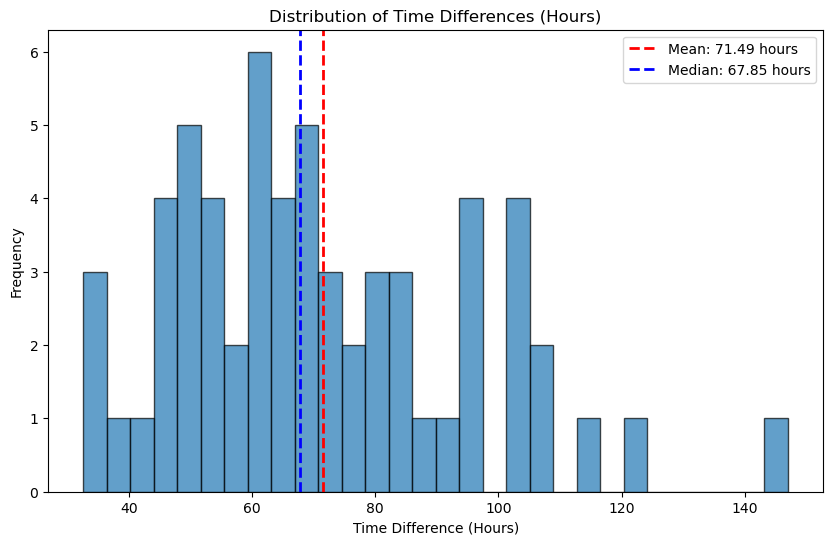

In [51]:
import matplotlib.pyplot as plt

merged_df['timeDiff_hours'] = merged_df['timeDiff'].dt.total_seconds() / 3600

time_diff_stats = merged_df['timeDiff'].describe()
mean_time = time_diff_stats['mean'].total_seconds() / 3600
median_time = time_diff_stats['50%'].total_seconds() / 3600

plt.figure(figsize=(10, 6))
plt.hist(merged_df['timeDiff_hours'], bins=30, edgecolor='black', alpha=0.7)

plt.axvline(mean_time_hours, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_time_hours:.2f} hours')
plt.axvline(median_time_hours, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_time_hours:.2f} hours')

plt.title('Distribution of Time Differences (Hours)')
plt.xlabel('Time Difference (Hours)')
plt.ylabel('Frequency')

plt.legend()

plt.show()


### Exporting data in csv format

In [52]:
# Export data to CSV without the index

merged_df.to_csv('merged_data_export.csv', index=False)
